<a href="https://colab.research.google.com/github/shubhamgogri/Python--DS/blob/main/Coursera/k-means/k_means_pract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

guide for the k-means model selection and visualization

https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/shubhamgogri/Python--DS/main/Coursera/k-means/happyscore_income.csv')
data.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,GDP,happyScore
0,Armenia,37,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',0.76821,4.350
1,Angola,26,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',0.75778,4.033
2,Argentina,60,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',1.05351,6.574
3,Austria,59,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',1.33723,7.200
4,Australia,65,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',1.33358,7.284


In [3]:
import matplotlib.pyplot as plt

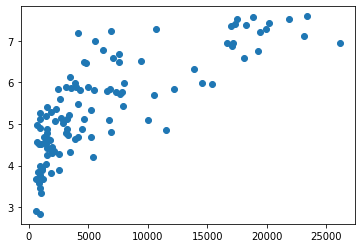

In [4]:
plt.scatter(data["avg_income"], data['happyScore'])

In [5]:
data.avg_income

0       2096.76
1       1448.88
2       7101.12
3      19457.04
4      19917.00
         ...   
106     7544.40
107     2231.40
108     3889.32
109      956.76
110     1768.56
Name: avg_income, Length: 111, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    int64  
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   GDP                    111 non-null    float64
 9   happyScore             111 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 8.8+ KB


In [7]:
data.sort_values('avg_income', inplace = True )
data 

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,GDP,happyScore
10,Burundi,25,2.9,1.96,572.880,436.92,33.360000,'Sub-Saharan Africa',0.01530,2.905
65,Madagascar,33,3.7,1.86,574.200,415.48,40.720000,'Sub-Saharan Africa',0.20824,3.681
58,Liberia,37,4.4,2.02,653.040,528.72,36.480000,'Sub-Saharan Africa',0.07120,4.571
72,Mozambique,34,3.8,1.76,714.720,488.52,45.580000,'Sub-Saharan Africa',0.08308,4.971
73,Niger,34,3.8,1.75,718.400,535.56,37.726667,'Sub-Saharan Africa',0.06940,3.845
...,...,...,...,...,...,...,...,...,...,...
16,Canada,69,8.0,1.71,20190.780,16829.10,33.790000,'North America',1.32629,7.427
77,Norway,70,8.0,1.62,21877.710,19477.62,27.307500,'Western Europe',1.45900,7.522
105,United States,62,7.3,1.92,23127.000,17925.36,41.090000,'North America',1.39451,7.119
17,Switzerland,70,8.0,1.62,23400.040,19442.92,32.930000,'Western Europe',1.39651,7.587


In [8]:
rich = data[data['avg_income'] > 15000]

In [9]:
rich

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,GDP,happyScore
49,Italy,57,6.6,1.81,15437.59500,13163.07000,34.126250,'Western Europe',1.25114,5.948
44,Ireland,64,7.5,1.85,16657.77000,13823.16000,32.418750,'Western Europe',1.33596,6.940
90,Sweden,67,7.8,1.72,17032.75500,15166.60500,26.950000,'Western Europe',1.33171,7.364
36,United Kingdom,60,7.1,1.98,17099.55000,14172.73500,34.432500,'Western Europe',1.26637,6.867
7,Belgium,63,7.2,1.72,17168.50500,15166.45500,28.745000,'Western Europe',1.30782,6.937
33,Finland,70,7.9,1.53,17310.19500,14962.56000,27.723750,'Western Europe',1.29025,7.406
27,Denmark,74,8.4,1.53,17496.51000,15630.88500,28.155000,'Western Europe',1.32548,7.527
34,France,52,6.4,2.15,18096.78857,14971.25143,32.255714,'Western Europe',1.27778,6.575
76,Netherlands,69,7.6,1.38,18234.43500,15880.54500,29.271250,'Western Europe',1.32944,7.378
48,Iceland,71,8.1,1.64,18828.34500,16179.31500,28.780000,'Western Europe',1.30232,7.561


In [10]:
mean_rich = np.mean(rich['avg_income'])
all_mean = np.mean(data['avg_income'])
print(mean_rich)
print(all_mean)

19266.68075388889
6442.751416180181


In [11]:
rich.columns.size

10

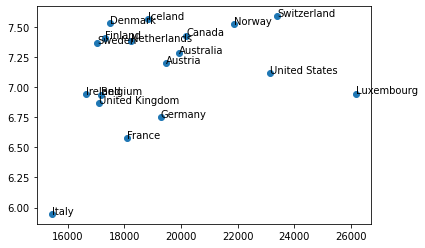

In [12]:
plt.scatter(rich['avg_income'], rich['happyScore'])
for i,row in rich.iterrows():
  plt.text(row['avg_income'], row['happyScore']
         ,row['country'])


In [13]:
[plt.text(row['avg_income'], row['happyScore']
         ,row['country']) for k,row in rich.iterrows()]

[Text(15437.595, 5.948, 'Italy'),
 Text(16657.77, 6.94, 'Ireland'),
 Text(17032.755, 7.364, 'Sweden'),
 Text(17099.55, 6.867, 'United Kingdom'),
 Text(17168.505, 6.937, 'Belgium'),
 Text(17310.195, 7.406, 'Finland'),
 Text(17496.51, 7.527, 'Denmark'),
 Text(18096.78857, 6.575, 'France'),
 Text(18234.435, 7.378, 'Netherlands'),
 Text(18828.345, 7.561, 'Iceland'),
 Text(19285.96, 6.75, 'Germany'),
 Text(19457.04, 7.2, 'Austria'),
 Text(19917.0, 7.284, 'Australia'),
 Text(20190.78, 7.427, 'Canada'),
 Text(21877.71, 7.522, 'Norway'),
 Text(23127.0, 7.119, 'United States'),
 Text(23400.04, 7.587, 'Switzerland'),
 Text(26182.275, 6.946, 'Luxembourg')]

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [14]:
temp = data.copy()
temp.drop(['country', 'region'], inplace = True, axis = 1) 

In [15]:
temp

,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,GDP,happyScore
10,25,2.9,1.96,572.880,436.92,33.360000,0.01530,2.905
65,33,3.7,1.86,574.200,415.48,40.720000,0.20824,3.681
58,37,4.4,2.02,653.040,528.72,36.480000,0.07120,4.571
72,34,3.8,1.76,714.720,488.52,45.580000,0.08308,4.971
73,34,3.8,1.75,718.400,535.56,37.726667,0.06940,3.845
...,...,...,...,...,...,...,...,...
16,69,8.0,1.71,20190.780,16829.10,33.790000,1.32629,7.427
77,70,8.0,1.62,21877.710,19477.62,27.307500,1.45900,7.522
105,62,7.3,1.92,23127.000,17925.36,41.090000,1.39451,7.119
17,70,8.0,1.62,23400.040,19442.92,32.930000,1.39651,7.587


In [16]:
from sklearn.cluster import KMeans

https://www.edupristine.com/blog/beyond-k-means

### Elbow method

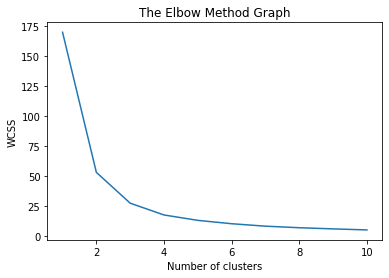

In [18]:
wcss = []
input_data = np.column_stack((temp.GDP, temp.happyScore))
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init=10, random_state = 0)
  kmeans.fit(input_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

i above is between 1-10 numbers. init parameter is the random #initialization method  
we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
the next parameter is n_init which is the number of times the #K_means algorithm will be run with
different initial centroid.

In [22]:
# According to the Elbow graph we deterrmine the clusters number as #3. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which 
#client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(input_data)


In [43]:
len(input_data[y_kmeans == 0, 1])

28

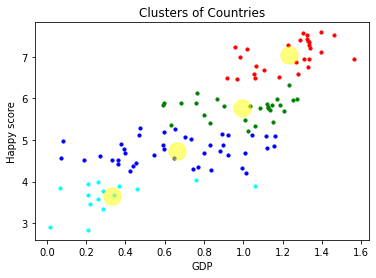

In [28]:
#Visualising the clusters
plt.scatter(input_data[y_kmeans==0, 0], input_data[y_kmeans==0, 1], s=10, c='red', label ='Cluster 1')
plt.scatter(input_data[y_kmeans==1, 0], input_data[y_kmeans==1, 1], s=10, c='blue', label ='Cluster 2')
plt.scatter(input_data[y_kmeans==2, 0], input_data[y_kmeans==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(input_data[y_kmeans==3, 0], input_data[y_kmeans==3, 1], s=10, c='cyan', label ='Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids', alpha = 0.5)
plt.title('Clusters of Countries')
plt.xlabel('GDP')
plt.ylabel('Happy score')
plt.show()

### kmeans clusters = 2

In [51]:
kmean = KMeans(n_clusters= 2).fit(input_data)

In [52]:
clusters = kmean.cluster_centers_
clusters

array([[0.61232145, 4.54      ],
       [1.13240776, 6.53779592]])

In [53]:
input_data[kmean.labels_==0, 0]

array([0.0153 , 0.20824, 0.0712 , 0.08308, 0.0694 , 0.33024, 0.25812,
       0.26074, 0.37545, 0.65435, 0.20868, 0.2852 , 0.22208, 0.47038,
       0.28665, 0.19073, 0.21102, 0.36498, 0.34193, 0.39753, 0.64499,
       0.35997, 0.75778, 0.59543, 0.4225 , 0.59066, 0.36471, 0.39047,
       0.82827, 0.54558, 0.271  , 0.47428, 0.46038, 0.44025, 0.45407,
       0.7419 , 0.76821, 0.70532, 0.63216, 1.06024, 0.83524, 0.89012,
       0.73479, 0.59532, 1.04345, 0.82819, 0.88113, 1.02389, 0.99355,
       0.92049, 1.00761, 0.79907, 0.89537, 0.92053, 1.0088 , 1.06098,
       1.01216, 1.11312, 1.12094, 1.15174, 1.15991, 1.15406])

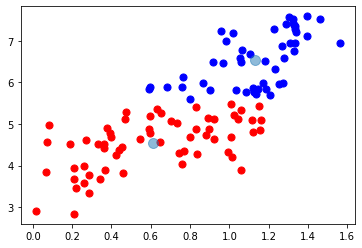

In [64]:
plt.scatter(input_data[kmean.labels_==0, 0], input_data[kmean.labels_==0, 1] , s=50, color = 'red', label = 0)
plt.scatter(input_data[kmean.labels_==1, 0], input_data[kmean.labels_==1, 1], s=50, color = 'blue', label =1)
plt.scatter(clusters[:, 0], clusters[:,1], s = 100, alpha  = 0.5)

In [56]:
np.std(temp['GDP'])

0.38584065111317734

In [57]:
kmean.predict([[0.3,7]])

array([1], dtype=int32)

In [58]:
feat_2 = KMeans(n_clusters= 3).fit( np.column_stack((temp['GDP'], temp['avg_income'], temp['happyScore']))) 

In [59]:
#print(feat_2.cluster_centers_)
feat_2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

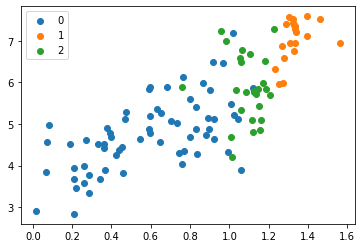

In [63]:
label = feat_2.labels_
u_labels = np.unique([label])
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(input_data[label == i , 0] , input_data[label == i , 1] , label = i)
plt.legend()
plt.show()